In [1]:
import statsmodels.api as sm
import pandas as pd
import statsmodels.tsa.stattools as ts
from matplotlib import pyplot as plt
import cointegracao

In [2]:
bd = pd.read_excel('BD COMPLETO.xlsx')

In [3]:
bd.dropna(axis=0, inplace=True)
bd.set_index('Data', inplace=True)
bd

,ARZZ3,AZUL4,B3SA3,BBAS3,BBDC3,BBDC4,BBSE3,BEEF3,BOVA11,BRAP4,...,SUZB3,TAEE11,TIET11,VVAR3,YDUQ3,NTCO3,ITSA4,BPAC11,BOVV11,dol
Data,,,,,,,,,,,,,,,,,,,,,
2017-04-11,28.5749,22.40,17.4028,28.1720,17.3703,17.6168,21.0011,9.78,62.42,17.2488,...,12.4039,16.4007,10.4669,3.9803,14.2525,14.7845,6.8240,15.8492,64.46,3.531422
2017-04-12,28.5031,22.96,17.3301,27.7085,17.2553,17.4412,20.7890,9.87,61.68,16.2195,...,12.2900,16.5075,10.3283,4.2291,14.5797,14.7213,6.7885,16.1625,64.00,3.519090
2017-04-13,28.7992,22.99,16.8300,26.2664,16.7844,16.9090,20.5403,9.95,60.80,16.3053,...,11.9958,16.2939,10.3822,4.2291,13.9166,14.5948,6.6179,15.5868,62.93,3.536467
2017-04-17,28.6646,22.85,17.7756,27.4853,17.4415,17.6662,21.2791,10.00,62.25,16.5540,...,11.8250,16.3865,10.4515,4.1793,14.7654,15.0277,6.7956,15.5783,64.44,3.483776
2017-04-18,28.2609,23.91,17.9120,27.7514,17.4470,17.5619,21.2060,9.95,61.95,16.1166,...,12.1476,16.5929,10.3052,4.3684,14.6769,14.9061,6.8525,15.2397,64.20,3.492744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-10,56.9600,26.10,56.0000,32.4254,19.3100,20.8500,26.2800,12.93,95.04,43.0300,...,46.3500,28.7300,14.9000,18.0200,27.3100,49.7500,9.4600,79.1300,99.20,5.325000
2020-09-11,55.7500,26.58,56.0200,31.8971,18.8700,20.4600,25.4700,12.93,94.48,44.9000,...,45.6000,28.3800,14.6500,17.9600,27.8900,51.6200,9.2700,78.1100,98.60,5.320500
2020-09-14,57.1700,28.25,58.7300,32.3600,19.1600,20.7000,25.8600,13.27,96.51,44.5500,...,46.1200,28.6000,14.7700,18.3700,30.1100,53.2600,9.3800,81.4800,100.72,5.273000


In [4]:
bd = bd.loc['2018-02-27': '2019-03-02']
bd[['PETR3', 'PETR4']]

,PETR3,PETR4
Data,,
2018-02-27,22.2914,20.0038
2018-02-28,22.3203,19.9665
2018-03-01,21.9540,19.5665
2018-03-02,22.3493,20.0131
2018-03-05,22.9856,20.5806
...,...,...
2019-02-25,29.6930,25.8945
2019-02-26,29.7027,25.7781
2019-02-27,29.8585,26.2630


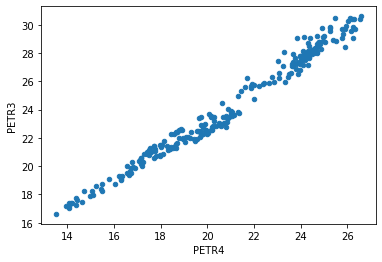

In [9]:
bd[['PETR3', 'PETR4']].plot(kind='scatter', x='PETR4', y='PETR3')

In [6]:
model = cointegracao.Cointegration()

In [7]:
model.cointegration_test(pairname='PETR3xPETR4', first_stock=bd['PETR3'], scnd_stock=bd['PETR4'], data='', z_score='')

True

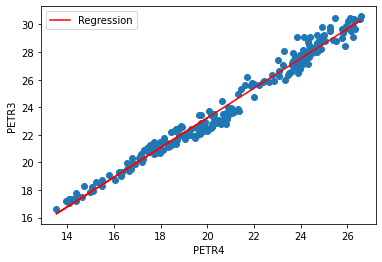

In [8]:
model.plot_scatter()

In [15]:
Y = bd['PETR3']
X = bd['PETR4']
X = sm.add_constant(X)
model = sm.OLS(Y, X)
reg = model.fit()

In [17]:
reg.params

const    1.751135
PETR4    1.074009
dtype: float64

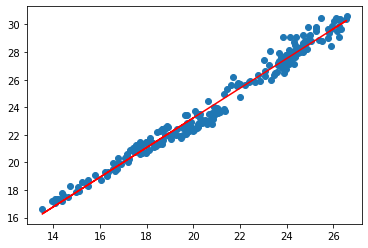

In [20]:
plt.scatter(x=bd['PETR4'], y=bd['PETR3'])
plt.plot(bd['PETR4'], reg.fittedvalues, color='red')

In [21]:
bd['PETR4'].name

'PETR4'

In [96]:
resid = reg.resid
resid_mean = resid.mean()
k = 2
upper = resid.std() * k
lower = resid.std() * -k

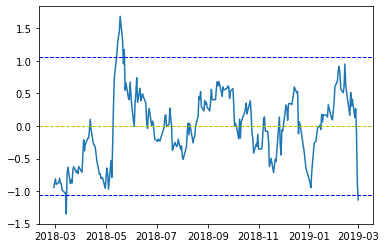

In [98]:
plt.plot(resid)
plt.axhline(y=resid_mean, color='y', linestyle='--', linewidth=1, label='Mean')
plt.axhline(y=upper,   color='b', linestyle='--', linewidth=1, label=f'+/-{k} STD')
plt.axhline(y=lower, color='b', linestyle='--', linewidth=1, label='_nolegend_')
plt.show()

In [99]:
adf_resid = ts.adfuller(resid)

In [101]:
resid_pvalue = adf_resid[1]
resid_pvalue

0.0028927625394583384

In [32]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PETR3   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                 2.845e+04
Date:                Wed, 27 Jul 2022   Prob (F-statistic):               0.00
Time:                        08:46:37   Log-Likelihood:                -1245.2
No. Observations:                 849   AIC:                             2494.
Df Residuals:                     847   BIC:                             2504.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1769      0.140      1.267      0.206      -0.097       0.451
PETR4          1.0906      0.006    168.684      0.000       1.078       1.103
==============================================================================
Omnibus:                       41.715   Durbin-Watson:                   0.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.606
Skew:                           0.069   Prob(JB):                     0.000150
Kurtosis:                       2.308   Cond. No.                         83.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
dir(reg)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'info_c